In [29]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [30]:
#Tables included in census table:
# Race (NHGIS code:  ALUC),
# Hispanic or Latino Origin by Race(NHGIS code:  ALUK),
# Household Income in the Past 12 Months (in 2019 Inflation-Adjusted Dollars) (NHGIS code:  ALW0)

# load census data
census_data = pd.read_csv("../../data/census_race_income_csv 2/nhgis0003_ds244_20195_tract.csv", encoding = "ISO-8859-1")

In [31]:
# check shape
census_data.shape

(74001, 140)

In [32]:
#check head
census_data.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID,BTTRA,BTBGA,NAME_E,ALUCE001,ALUCE002,ALUCE003,ALUCE004,ALUCE005,ALUCE006,ALUCE007,ALUCE008,ALUCE009,ALUCE010,ALUKE001,ALUKE002,ALUKE003,ALUKE004,ALUKE005,ALUKE006,ALUKE007,ALUKE008,ALUKE009,ALUKE010,ALUKE011,ALUKE012,ALUKE013,ALUKE014,ALUKE015,ALUKE016,ALUKE017,ALUKE018,ALUKE019,ALUKE020,ALUKE021,ALW0E001,ALW0E002,ALW0E003,ALW0E004,ALW0E005,ALW0E006,ALW0E007,ALW0E008,ALW0E009,ALW0E010,ALW0E011,ALW0E012,ALW0E013,ALW0E014,ALW0E015,ALW0E016,ALW0E017,NAME_M,ALUCM001,ALUCM002,ALUCM003,ALUCM004,ALUCM005,ALUCM006,ALUCM007,ALUCM008,ALUCM009,ALUCM010,ALUKM001,ALUKM002,ALUKM003,ALUKM004,ALUKM005,ALUKM006,ALUKM007,ALUKM008,ALUKM009,ALUKM010,ALUKM011,ALUKM012,ALUKM013,ALUKM014,ALUKM015,ALUKM016,ALUKM017,ALUKM018,ALUKM019,ALUKM020,ALUKM021,ALW0M001,ALW0M002,ALW0M003,ALW0M004,ALW0M005,ALW0M006,ALW0M007,ALW0M008,ALW0M009,ALW0M010,ALW0M011,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017
0,G0100010020100,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020100,NaN,NaN,"Census Tract 201, Autauga County, Alabama",1993,1685,152,0,2,0,0,154,0,154,1993,1967,1659,152,0,2,0,0,154,0,154,26,26,0,0,0,0,0,0,0,0,709,26,55,100,28,12,7,34,16,18,56,78,98,24,46,73,38,"Census Tract 201, Autauga County, Alabama",225,202,78,12,5,12,12,120,12,120,225,226,205,78,12,5,12,12,120,12,120,36,36,12,12,12,12,12,12,12,12,65,27,41,60,30,9,8,35,13,17,37,41,53,17,36,42,28
1,G0100010020200,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020200,NaN,NaN,"Census Tract 202, Autauga County, Alabama",1959,759,1117,0,0,21,6,56,0,56,1959,1929,750,1117,0,0,0,6,56,0,56,30,9,0,0,0,21,0,0,0,0,688,64,83,65,3,21,52,25,51,30,72,35,90,45,36,16,0,"Census Tract 202, Autauga County, Alabama",202,113,180,12,12,32,10,61,12,61,202,193,111,180,12,12,12,10,61,12,61,35,14,12,12,12,32,12,12,12,12,85,59,50,49,7,19,37,21,36,20,40,24,38,25,30,16,12
2,G0100010020300,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020300,NaN,NaN,"Census Tract 203, Autauga County, Alabama",3507,2285,857,0,32,5,233,95,0,95,3507,3274,2285,857,0,32,5,0,95,0,95,233,0,0,0,0,0,233,0,0,0,1360,112,67,84,29,111,52,90,59,19,153,233,86,123,89,45,8,"Census Tract 203, Autauga County, Alabama",386,306,298,12,29,9,262,101,12,101,386,371,306,298,12,29,9,12,101,12,101,262,12,12,12,12,12,262,12,12,12,114,62,42,62,24,69,65,86,51,21,81,84,46,62,55,31,12
3,G0100010020400,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020400,NaN,NaN,"Census Tract 204, Autauga County, Alabama",3878,3495,216,32,11,0,0,124,14,110,3878,3836,3478,216,32,11,0,0,99,0,99,42,17,0,0,0,0,0,25,14,11,1675,31,71,81,79,41,30,89,173,75,171,238,210,156,88,112,30,"Census Tract 204, Autauga County, Alabama",317,302,180,43,16,12,12,78,23,69,317,314,301,180,43,16,12,12,68,12,68,38,24,12,12,12,12,12,30,23,22,124,28,51,51,63,49,21,55,85,49,71,75,86,69,46,48,19
4,G0100010020500,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020500,NaN,NaN,"Census Tract 205, Autauga County, Alabama",10596,7982,1929,0,385,0,49,251,0,251,10596,10127,7513,1929,0,385,0,49,251,0,251,469,469,0,0,0,0,0,0,0,0,4483,282,95,216,157,106,94,146,201,148,443,497,730,710,305,260,93,"

In [33]:
# check datatypes
census_data.dtypes

GISJOIN       object
YEAR          object
STUSAB        object
REGIONA      float64
DIVISIONA    float64
STATE         object
STATEA         int64
COUNTY        object
COUNTYA        int64
COUSUBA      float64
PLACEA       float64
TRACTA         int64
BLKGRPA      float64
CONCITA      float64
AIANHHA      float64
RES_ONLYA    float64
TRUSTA       float64
AIHHTLI      float64
AITS         float64
ANRCA        float64
CBSAA        float64
CSAA         float64
METDIVA      float64
MEMI         float64
NECTAA       float64
CNECTAA      float64
NECTADIVA    float64
UAA          float64
CDCURRA      float64
SLDUA        float64
SLDLA        float64
ZCTA5A       float64
SUBMCDA      float64
SDELMA       float64
SDSECA       float64
SDUNIA       float64
UR           float64
PCI          float64
PUMA5A       float64
GEOID         object
BTTRA        float64
BTBGA        float64
NAME_E        object
ALUCE001       int64
ALUCE002       int64
ALUCE003       int64
ALUCE004       int64
ALUCE005     

In [34]:
# check column names
census_data.columns

Index(['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA',
       'COUNTY', 'COUNTYA', 'COUSUBA',
       ...
       'ALW0M008', 'ALW0M009', 'ALW0M010', 'ALW0M011', 'ALW0M012', 'ALW0M013',
       'ALW0M014', 'ALW0M015', 'ALW0M016', 'ALW0M017'],
      dtype='object', length=140)

In [35]:
# check GISJOIN is unique key
assert census_data.shape[0]==len(set(census_data['GISJOIN']))

In [36]:
# looking at specific NYC tract to look at RACE_TOTAL v HISPANIC_LATINO_RACE_TOTAL
census_data.loc[(census_data['TRACTA']==16500)&(census_data['STATEA']==36)&(census_data['COUNTYA']==61),:]

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID,BTTRA,BTBGA,NAME_E,ALUCE001,ALUCE002,ALUCE003,ALUCE004,ALUCE005,ALUCE006,ALUCE007,ALUCE008,ALUCE009,ALUCE010,ALUKE001,ALUKE002,ALUKE003,ALUKE004,ALUKE005,ALUKE006,ALUKE007,ALUKE008,ALUKE009,ALUKE010,ALUKE011,ALUKE012,ALUKE013,ALUKE014,ALUKE015,ALUKE016,ALUKE017,ALUKE018,ALUKE019,ALUKE020,ALUKE021,ALW0E001,ALW0E002,ALW0E003,ALW0E004,ALW0E005,ALW0E006,ALW0E007,ALW0E008,ALW0E009,ALW0E010,ALW0E011,ALW0E012,ALW0E013,ALW0E014,ALW0E015,ALW0E016,ALW0E017,NAME_M,ALUCM001,ALUCM002,ALUCM003,ALUCM004,ALUCM005,ALUCM006,ALUCM007,ALUCM008,ALUCM009,ALUCM010,ALUKM001,ALUKM002,ALUKM003,ALUKM004,ALUKM005,ALUKM006,ALUKM007,ALUKM008,ALUKM009,ALUKM010,ALUKM011,ALUKM012,ALUKM013,ALUKM014,ALUKM015,ALUKM016,ALUKM017,ALUKM018,ALUKM019,ALUKM020,ALUKM021,ALW0M001,ALW0M002,ALW0M003,ALW0M004,ALW0M005,ALW0M006,ALW0M007,ALW0M008,ALW0M009,ALW0M010,ALW0M011,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017
45754,G3600610016500,2015-2019,NY,NaN,NaN,New York,36,New York County,61,NaN,NaN,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US36061016500,NaN,NaN,"Census Tract 165, New York County, New York",6512,5412,246,0,454,0,298,102,0,102,6512,5973,5230,187,0,454,0,0,102,0,102,539,182,59,0,0,0,298,0,0,0,3156,164,30,33,35,59,88,31,0,35,16,176,242,240,213,366,1428,"Census Tract 165, New York County, New York",583,567,198,17,240,17,178,70,17,70,583,546,560,178,17,240,17,17,70,17,70,220,140,94,17,17,17,178,17,17,17,276,116,36,39,32,94,78,35,17,36,25,107,150,138,96,149,208


In [37]:
#  Race Table Column: ALUCE001: Total is 6512
#  Hispanic or Latino Origin by Race Table Column: ALUKE001: Total is 6512
# confirmed RACE_Total and Hisp_Race_Total are equal

# information from code book:
#  TRACTA:       Census Tract Code
#  BLKGRPA:      Block Group Code
#  ZCTA5A:       5-Digit ZIP Code Tabulation Area Code
#  GEOID:        Census Geographic Identifier
#  Race Table Columns -- DO NOT NEED CAN JUST USE HISP TABLE
#   ALUCE001:    Total
#   ALUCE002:    White alone
#   ALUCE003:    Black or African American alone
#   ALUCE004:    American Indian and Alaska Native alone
#   ALUCE005:    Asian alone
#   ALUCE006:    Native Hawaiian and Other Pacific Islander alone
#  Hispanic or Latino Origin by Race Table Columns
#   ALUKE001:    Total
#   ALUKE003:    Not Hispanic or Latino: White alone
#   ALUKE004:    Not Hispanic or Latino: Black or African American alone
#   ALUKE005:    Not Hispanic or Latino: American Indian and Alaska Native alone
#   ALUKE006:    Not Hispanic or Latino: Asian alone
#   ALUKE012:    Hispanic or Latino
#  Household Income in the Past 12 Months (in 2019 Inflation-Adjusted Dollars) Columns
#   ALW0E001:    Total
#   ALW0E002:    Less than $10,000
#   ALW0E003:    $10,000 to $14,999
#   ALW0E004:    $15,000 to $19,999
#   ALW0E005:    $20,000 to $24,999
#   ALW0E006:    $25,000 to $29,999
#   ALW0E007:    $30,000 to $34,999
#   ALW0E008:    $35,000 to $39,999
#   ALW0E009:    $40,000 to $44,999
#   ALW0E010:    $45,000 to $49,999
#   ALW0E011:    $50,000 to $59,999
#   ALW0E012:    $60,000 to $74,999
#   ALW0E013:    $75,000 to $99,999
#   ALW0E014:    $100,000 to $124,999
#   ALW0E015:    $125,000 to $149,999
#   ALW0E016:    $150,000 to $199,999
#   ALW0E017:    $200,000 or more

# filter to desired columns
cols = ['GISJOIN','STATE','COUNTY','COUNTYA','TRACTA','BLKGRPA','ZCTA5A','GEOID',
        #  Hispanic or Latino Origin by Race Table Columns
        'ALUKE001','ALUKE002','ALUKE003','ALUKE004','ALUKE005','ALUKE006','ALUKE012',
        #  Household Income in the Past 12 Months (in 2019 Inflation-Adjusted Dollars) Columns
        'ALW0E001','ALW0E002','ALW0E003','ALW0E004','ALW0E005','ALW0E006','ALW0E007','ALW0E008','ALW0E009',
        'ALW0E010','ALW0E011','ALW0E012','ALW0E013','ALW0E014','ALW0E015','ALW0E016','ALW0E017']

# only include rows in New York State (ID 36) and New York County (ID 61)
rows = (census_data['STATEA']==36) & (census_data['COUNTYA']==61)

# create df with ny data and desired columns
ny_county_data = census_data.loc[rows,cols]

# check that state is only ny
assert set(ny_county_data['STATE'])== {'New York'}

# check that county is only ny
assert set(ny_county_data['COUNTY']) == {'New York County'}

In [38]:
# see how many nulls in columns
ny_county_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 45583 to 45870
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GISJOIN   288 non-null    object 
 1   STATE     288 non-null    object 
 2   COUNTY    288 non-null    object 
 3   COUNTYA   288 non-null    int64  
 4   TRACTA    288 non-null    int64  
 5   BLKGRPA   0 non-null      float64
 6   ZCTA5A    0 non-null      float64
 7   GEOID     288 non-null    object 
 8   ALUKE001  288 non-null    int64  
 9   ALUKE002  288 non-null    int64  
 10  ALUKE003  288 non-null    int64  
 11  ALUKE004  288 non-null    int64  
 12  ALUKE005  288 non-null    int64  
 13  ALUKE006  288 non-null    int64  
 14  ALUKE012  288 non-null    int64  
 15  ALW0E001  288 non-null    int64  
 16  ALW0E002  288 non-null    int64  
 17  ALW0E003  288 non-null    int64  
 18  ALW0E004  288 non-null    int64  
 19  ALW0E005  288 non-null    int64  
 20  ALW0E006  288 non-null    

In [39]:
# combine some income columns to make more readable
ny_county_data['10000_TO_24999'] = ny_county_data['ALW0E003']+ny_county_data['ALW0E004']+ny_county_data['ALW0E005']
ny_county_data['25000_TO_49999'] = ny_county_data['ALW0E006']+ny_county_data['ALW0E007']+ny_county_data['ALW0E008']+ny_county_data['ALW0E009']+ny_county_data['ALW0E010']
ny_county_data['50000_TO_99999'] = ny_county_data['ALW0E011']+ny_county_data['ALW0E012']+ny_county_data['ALW0E013']

# rename columns to make more readable
col_names = {'TRACTA':'CENSUS_TRACT','ALUKE001':'RACE_TOTAL','ALUKE003':'WHITE','ALUKE004':'BLACK','ALUKE005':'AMERICAN_INDIAN',
             'ALUKE006':'ASIAN','ALUKE012':'HISPANIC',
             'ALW0E001': 'INCOME_TOTAL', 'ALW0E002':'LESS_THAN_10000','ALW0E014':'100000_TO_124999',
             'ALW0E015':'125000_TO_149999','ALW0E016':'150000_TO_199999','ALW0E017':'200000_OR_MORE'}

ny_county_data = ny_county_data.rename(columns = col_names)

In [40]:
# check TRACTA is unique key
assert ny_county_data.shape[0]==len(set(ny_county_data['CENSUS_TRACT']))

In [41]:
# create smaller df with only desired columns (as copy)
ny_county_slim = ny_county_data[['CENSUS_TRACT', 'RACE_TOTAL', 'WHITE', 'BLACK', 'AMERICAN_INDIAN','ASIAN', 'HISPANIC',
       'INCOME_TOTAL', 'LESS_THAN_10000', '100000_TO_124999', '125000_TO_149999', '150000_TO_199999',
       '200000_OR_MORE', '10000_TO_24999', '25000_TO_49999', '50000_TO_99999']].copy()

# check head
ny_county_slim.head()

,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999
45583,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45584,201,2750,288,182,0,1173,1105,1092,239,25,12,7,14,256,364,175
45585,202,7773,1543,1550,47,1494,3038,3389,761,195,88,103,325,708,561,648
45586,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45587,600,9838,460,715,86,5789,2788,4049,817,145,50,42,78,1839,578,500


In [42]:
# look at dataframe
ny_county_slim.describe()

,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,14288.555556,5666.642361,2658.427083,706.909722,6.673611,682.944444,1463.680556,2637.013889,217.406250,209.739583,159.354167,230.458333,597.673611,327.440972,343.142361,551.798611
std,8313.542304,3146.929925,2359.060393,1037.398105,22.243608,850.758557,1959.140079,1538.789386,178.646045,168.406856,142.057429,202.818498,585.591274,287.484446,253.175437,381.703354
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7375.000000,3405.250000,729.500000,72.250000,0.000000,180.750000,342.250000,1529.250000,76.750000,87.500000,60.000000,84.250000,104.000000,103.500000,146.250000,267.750000
50%,14401.500000,5408.500000,2002.000000,259.000000,0.000000,476.000000,704.000000,2486.000000,172.000000,170.500000,114.000000,169.500000,377.500000,251.500000,294.000000,500.000000
75%,20925.750000,7765.500000,4118.500000,917.500000,0.000000,887.000000,1786.500000,3577.500000,318.000000,296.500000,234.000000,339.000000,1022.500000,500.250000,501.750000,768.500000
max,31900.000000,16594.000000,12628.000000,5884.000000,256.000000,7994.000000,11679.000000,8134.000000,894.000000,1317.000000,789.000000,1005.000000,2379.000000,1839.000000,1210.000000,2321.000000


In [43]:
# check how many rows with zero race and income data
print("rows missing RACE_TOTAL: ", sum(ny_county_slim['RACE_TOTAL']==0))
print("rows missing INCOME_TOTAL: ", sum(ny_county_slim['INCOME_TOTAL']==0))

# look at zero race and income data
missing_income = ny_county_slim.loc[ny_county_slim['INCOME_TOTAL']==0,:]
missing_income

# 100 is 1.00 Statue of Liberty & Ellis Island
# 500 is 5.00 Governors Island
# 8602 is 86.02 East River
# 14300 is Central Park
# 24000 is Randalls Island
# 29700 is Inwood
# 31100 is East River
# 31900 is Battery Park

rows missing RACE_TOTAL:  5
rows missing INCOME_TOTAL:  8


,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999
45583,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45586,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45667,8602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45725,14300,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0
45832,24000,2009,376,1045,11,63,482,0,0,0,0,0,0,0,0,0
45862,29700,22,4,13,0,2,3,0,0,0,0,0,0,0,0,0
45867,31100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45870,31900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# define race columns
race_cols = ['WHITE', 'BLACK', 'AMERICAN_INDIAN','ASIAN', 'HISPANIC']

# define income columns
income_cols = ['LESS_THAN_10000', '100000_TO_124999', '125000_TO_149999', '150000_TO_199999',
       '200000_OR_MORE', '10000_TO_24999', '25000_TO_49999', '50000_TO_99999']

# create columns for race percentages
for race in race_cols:
    col_name = race + '_PERCENT'
    ny_county_slim[col_name] = (ny_county_slim[race]/ny_county_slim['RACE_TOTAL'])*100

# create columns for income percentages
for income in income_cols:
    col_name = income + '_PERCENT'
    ny_county_slim[col_name] = (ny_county_slim[income]/ny_county_slim['INCOME_TOTAL'])*100

# check columns were created properly
ny_county_slim.columns

Index(['CENSUS_TRACT', 'RACE_TOTAL', 'WHITE', 'BLACK', 'AMERICAN_INDIAN',
       'ASIAN', 'HISPANIC', 'INCOME_TOTAL', 'LESS_THAN_10000',
       '100000_TO_124999', '125000_TO_149999', '150000_TO_199999',
       '200000_OR_MORE', '10000_TO_24999', '25000_TO_49999', '50000_TO_99999',
       'WHITE_PERCENT', 'BLACK_PERCENT', 'AMERICAN_INDIAN_PERCENT',
       'ASIAN_PERCENT', 'HISPANIC_PERCENT', 'LESS_THAN_10000_PERCENT',
       '100000_TO_124999_PERCENT', '125000_TO_149999_PERCENT',
       '150000_TO_199999_PERCENT', '200000_OR_MORE_PERCENT',
       '10000_TO_24999_PERCENT', '25000_TO_49999_PERCENT',
       '50000_TO_99999_PERCENT'],
      dtype='object')

In [45]:
# looking at specific tract to see what's what
ny_county_slim.loc[(ny_county_slim['CENSUS_TRACT']==16500),:]

,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999,WHITE_PERCENT,BLACK_PERCENT,AMERICAN_INDIAN_PERCENT,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
45754,16500,6512,5230,187,0,454,539,3156,164,240,213,366,1428,98,213,434,80.313268,2.871622,0.0,6.971744,8.277027,5.196451,7.604563,6.749049,11.596958,45.247148,3.105196,6.749049,13.751584


In [46]:
# check shape
ny_county_slim.shape

(288, 29)

In [47]:
# load census tracts map
# obtained from https://data.cityofnewyork.us/City-Government/2010-Census-Tracts/fxpq-c8ku
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')

In [48]:
# check shape
tract_gdf.shape

(2165, 12)

In [49]:
# check datatypes
tract_gdf.dtypes

boro_code       object
boro_ct201      object
boro_name       object
cdeligibil      object
ct2010          object
ctlabel         object
ntacode         object
ntaname         object
puma            object
shape_area     float64
shape_leng     float64
geometry      geometry
dtype: object

In [50]:
# check head
tract_gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


In [51]:
# create only Manhattan
ny_county_tracts_gdf = tract_gdf.loc[tract_gdf['boro_name']=='Manhattan'].copy()

# check shape
ny_county_tracts_gdf.shape

(288, 12)

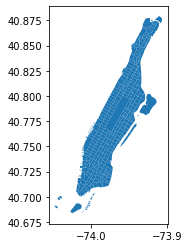

In [52]:
#plot tracts
ax = ny_county_tracts_gdf.plot()

In [53]:
# check crs
ny_county_tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
# check if ct2010 is unique key
len(set(ny_county_tracts_gdf['ct2010']))

288

In [55]:
# check format of census shape file key
set(ny_county_tracts_gdf['ct2010'])

{'000100',
 '000201',
 '000202',
 '000500',
 '000600',
 '000700',
 '000800',
 '000900',
 '001001',
 '001002',
 '001200',
 '001300',
 '001401',
 '001402',
 '001501',
 '001502',
 '001600',
 '001800',
 '002000',
 '002100',
 '002201',
 '002202',
 '002400',
 '002500',
 '002601',
 '002602',
 '002700',
 '002800',
 '002900',
 '003001',
 '003002',
 '003100',
 '003200',
 '003300',
 '003400',
 '003601',
 '003602',
 '003700',
 '003800',
 '003900',
 '004000',
 '004100',
 '004200',
 '004300',
 '004400',
 '004500',
 '004700',
 '004800',
 '004900',
 '005000',
 '005200',
 '005400',
 '005501',
 '005502',
 '005600',
 '005700',
 '005800',
 '005900',
 '006000',
 '006100',
 '006200',
 '006300',
 '006400',
 '006500',
 '006600',
 '006700',
 '006800',
 '006900',
 '007000',
 '007100',
 '007200',
 '007300',
 '007400',
 '007500',
 '007600',
 '007700',
 '007800',
 '007900',
 '008000',
 '008100',
 '008200',
 '008300',
 '008400',
 '008601',
 '008602',
 '008603',
 '008700',
 '008800',
 '008900',
 '009000',
 '009100',

In [56]:
# check format of census data key
set(ny_county_slim['CENSUS_TRACT'])

{100,
 201,
 202,
 500,
 600,
 700,
 800,
 900,
 1001,
 1002,
 1200,
 1300,
 1401,
 1402,
 1501,
 1502,
 1600,
 1800,
 2000,
 2100,
 2201,
 2202,
 2400,
 2500,
 2601,
 2602,
 2700,
 2800,
 2900,
 3001,
 3002,
 3100,
 3200,
 3300,
 3400,
 3601,
 3602,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4700,
 4800,
 4900,
 5000,
 5200,
 5400,
 5501,
 5502,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8601,
 8602,
 8603,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900,
 10000,
 10100,
 10200,
 10300,
 10400,
 10601,
 10602,
 10800,
 10900,
 11000,
 11100,
 11201,
 11202,
 11203,
 11300,
 11401,
 11402,
 11500,
 11600,
 11700,
 11800,
 11900,
 12000,
 12100,
 12200,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 13200,
 13300,
 13400,
 13500,
 13600,
 13700,
 13

In [57]:
# update census tract file key format to string
ny_county_tracts_gdf['ct2010'] = ny_county_tracts_gdf['ct2010'].apply(str)

# update  census data key format to match census shape file key format
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(str)
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(lambda x: x.zfill(6))

# check keys are the same format and values before joining
set(ny_county_tracts_gdf['ct2010']) == set(ny_county_slim['CENSUS_TRACT'])

True

In [58]:
# join on census tract ID
tracts_census_data = ny_county_tracts_gdf.merge(ny_county_slim, how='inner', left_on='ct2010',right_on='CENSUS_TRACT')

# check shape
tracts_census_data.shape

(288, 41)

In [59]:
# check head
tracts_census_data.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999,WHITE_PERCENT,BLACK_PERCENT,AMERICAN_INDIAN_PERCENT,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
0,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",009800,7302,5510,153,10,791,718,4242,136,249,252,347,1585,475,308,890,75.458778,2.095316,0.136949,10.832649,9.832922,3.206035,5.869873,5.940594,8.180104,37.364451,11.197548,7.260726,20.980669
1,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",010200,122,67,7,28,2,14,66,5,8,18,0,4,26,0,5,54.918033,5.737705,22.950820,1.639344,11.475410,7.575758,12.121212,27.272727,0.000000,6.060606,39.393939,0.000000,7.575758
2,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",010400,811,511,12,0,156,73,522,22,76,53,41,173,42,20,95,63.008631,1.479655,0.000000,19.235512,9.001233,4.214559,14.559387,10.153257,7.854406,33.141762,8.045977,3.831418,18.199234
3,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",011300,98,15,38,0,33,0,53,11,5,10,5,3,0,7,12,15.306122,38.775510,0.000000,33.673469,0.000000,20.754717,9.433962,18.867925,9.433962,5.660377,0.000000,13.207547,22.641509
4,1,1013000,Manhattan,I,013000,130,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,"POLYGON ((-73.96148 40.77432, -73.96194 40.773...",013000,3314,2894,20,0,144,181,1789,24,102,17,159,893,50,192,352,87.326494,0.603500,0.000000,4.345202,5.461678,1.341532,5.701509,0.950252,8.887647,49.916154,2.794857,10.732253,19.675797


<AxesSubplot:>

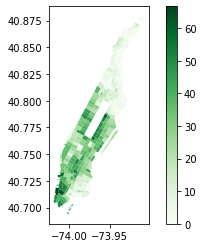

In [60]:
tracts_census_data.plot(column='200000_OR_MORE_PERCENT', cmap='Greens',legend=True)

<AxesSubplot:>

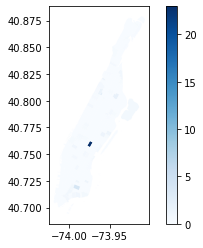

In [61]:
tracts_census_data.plot(column='AMERICAN_INDIAN_PERCENT', cmap='Blues',legend=True)